In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Ekangsh/Desktop/Datasets_2026.csv")

In [3]:
data

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Smoker,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Smoker,Self-Employed,> 40L,99,High blood pressure,Silver,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Smoker,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490


In [61]:
percent_dev = (data['Annual_Premium_Amount']-data['Annual_Premium_Amount'].mean())/data['Annual_Premium_Amount'] * 100

In [62]:
top_10 = percent_dev.sort_values(ascending = False).head(10)

In [63]:
top_10

46124    63.727275
9920     63.431164
22653    62.320502
19922    62.148648
16457    62.055741
29627    61.968799
14143    61.836251
31513    61.045219
29540    60.715242
6392     60.641699
Name: Annual_Premium_Amount, dtype: float64

In [7]:
age_smoker = data.groupby(['Age', 'Smoking_Status'])

In [66]:
df = age_smoker['Annual_Premium_Amount'].mean().reset_index()

In [67]:
df

,Age,Smoking_Status,Annual_Premium_Amount
0,18,No Smoking,8032.880441
1,18,Smoker,8567.450670
2,19,No Smoking,7990.384046
3,19,Smoker,8341.145363
4,20,No Smoking,8030.007394
...,...,...,...
115,203,Smoker,19269.142857
116,224,No Smoking,13634.571429
117,224,Smoker,21011.666667
118,356,No Smoking,17811.600000


In [10]:
smoking = df[df['Smoking_Status'].isin(['Smoker'])].groupby('Age')['Annual_Premium_Amount'].sum()

non_smoking = df[df['Smoking_Status'].isin(['No Smoking'])].groupby('Age')['Annual_Premium_Amount'].sum()

In [11]:
sii = smoking/non_smoking

In [12]:
sii

Age
18     1.066548
19     1.043898
20     1.070222
21     1.076117
22     1.059129
23     1.078146
24     1.040140
25     1.053564
26     1.175660
27     1.129459
28     1.178382
29     1.181791
30     1.187083
31     1.157727
32     1.188560
33     1.194835
34     1.156776
35     1.145732
36     1.172162
37     1.144513
38     1.191815
39     1.163941
40     1.121031
41     1.198014
42     1.125478
43     1.143943
44     1.166717
45     1.135103
46     1.119714
47     1.096959
48     1.068918
49     1.087482
50     1.086839
51     1.118404
52     1.115488
53     1.111780
54     1.123346
55     1.116925
56     1.085777
57     1.101345
58     1.120768
59     1.135062
60     1.147048
61     1.114772
62     1.088496
63     1.124119
64     1.170216
65     1.052224
66     1.113848
67     1.110187
68     1.176563
69     1.106658
70     1.119059
71     1.158414
72     1.119646
124    1.339994
136    1.945951
203    1.417196
224    1.541058
356    1.323267
Name: Annual_Premium_Amount, dtype: 

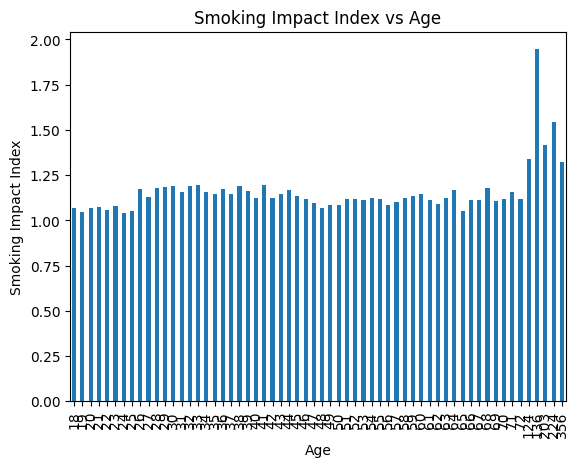

In [13]:
sii.plot(kind='bar')
plt.title('Smoking Impact Index vs Age')
plt.xlabel('Age')
plt.ylabel('Smoking Impact Index')
plt.show()

In [14]:
age = data.groupby('Age')

In [15]:
age['Annual_Premium_Amount'].sum().sort_values(ascending = False)

Age
21     20918843
18     20874530
22     20850748
19     20688368
23     20322569
25     20276530
24     20133394
20     19555465
54     19376383
60     18363167
56     18010539
58     17929817
59     17810266
46     17702333
45     17622416
51     17615648
57     17358285
47     17268083
50     17171332
48     17153438
52     17116831
27     16970047
55     16901708
29     16799858
53     16749755
38     16720086
30     16546734
39     16463975
49     16428258
41     16316764
44     16316518
28     16232286
43     16034535
36     15954919
37     15929810
32     15857744
35     15835047
26     15519496
31     15508216
42     15444330
40     15282702
34     15134334
33     15049157
69      3918437
65      3788676
63      3757322
67      3697440
62      3475079
66      3302229
64      3150802
71      3041907
72      2972481
61      2933203
70      2908660
68      2418814
136      260444
203      216464
356      183336
224      158477
124      106781
Name: Annual_Premium_Amount, dtype: 

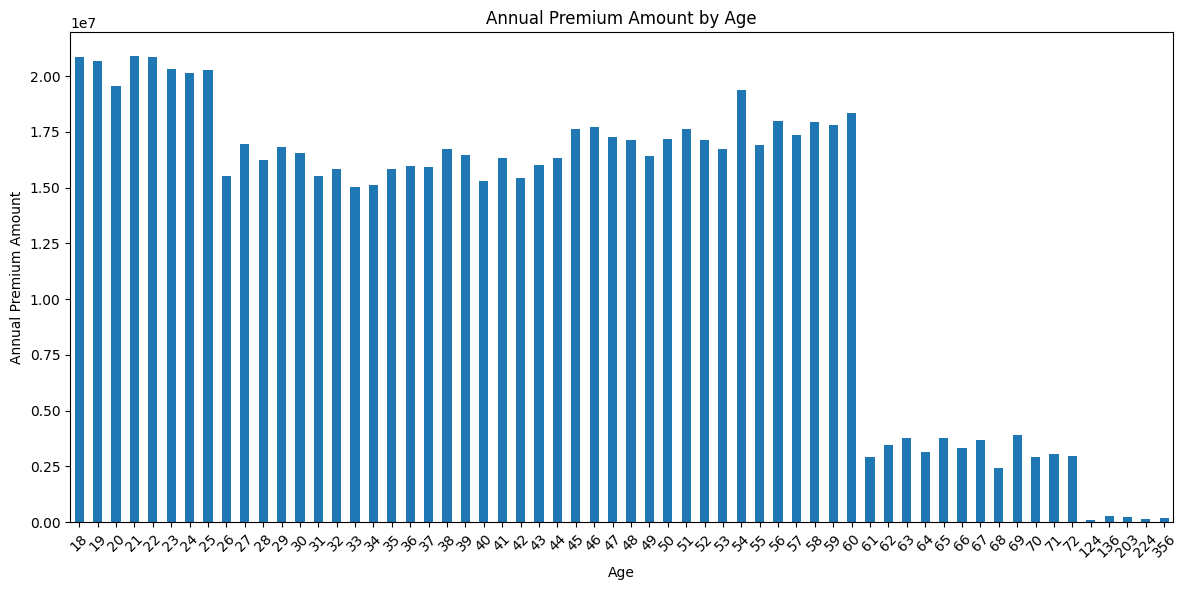

In [68]:
age['Annual_Premium_Amount'].sum().plot(kind='bar', figsize=(12, 6))
plt.title('Annual Premium Amount by Age')
plt.xlabel('Age')
plt.ylabel('Annual Premium Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
income_lvl = data.groupby('Income_Level')

In [18]:
avg_income_per_lvl = income_lvl['Income_Lakhs'].mean()*100000

In [19]:
avg_income_per_lvl

Income_Level
10L - 25L    1.751810e+06
25L - 40L    3.260741e+06
<10L         5.043285e+05
> 40L        7.063981e+06
Name: Income_Lakhs, dtype: float64

In [20]:
avg_premium_per_lvl = income_lvl['Annual_Premium_Amount'].mean()

In [21]:
avg_premium_per_lvl

Income_Level
10L - 25L    16812.191370
25L - 40L    16935.213453
<10L         12873.664113
> 40L        19835.132209
Name: Annual_Premium_Amount, dtype: float64

In [22]:
percent_pr_per_lvl = avg_premium_per_lvl/avg_income_per_lvl*100

In [23]:
percent_pr_per_lvl.sort_values(ascending = False).head(1)

Income_Level
<10L    2.552635
dtype: float64

In [24]:
bmi = data.groupby('BMI_Category')

In [25]:
pr_bmi = bmi['Annual_Premium_Amount'].mean()

In [26]:
pr_bmi

BMI_Category
Normal         13665.145336
Obesity        20912.632380
Overweight     18640.523711
Underweight    13114.789006
Name: Annual_Premium_Amount, dtype: float64

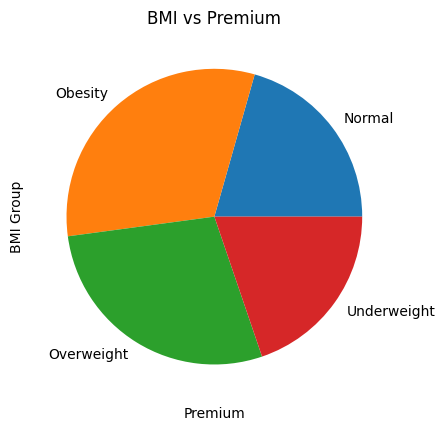

In [27]:
pr_bmi.plot(kind='pie')
plt.title('BMI vs Premium')
plt.xlabel('Premium')
plt.ylabel('BMI Group')
plt.show()

In [28]:
bmi_smoker = data.groupby(['BMI_Category', 'Smoking_Status'])

In [29]:
amplif = bmi_smoker['Annual_Premium_Amount'].mean()

In [30]:
amplif.reset_index()

,BMI_Category,Smoking_Status,Annual_Premium_Amount
0,Normal,No Smoking,12322.986526
1,Normal,Smoker,15498.118916
2,Obesity,No Smoking,19415.276932
3,Obesity,Smoker,22431.841824
4,Overweight,No Smoking,16542.340218
5,Overweight,Smoker,20494.861034
6,Underweight,No Smoking,11934.607921
7,Underweight,Smoker,14987.912492


In [31]:
medical = data.groupby(['Medical History', 'Marital_status'])

In [69]:
marital_med = medical['Annual_Premium_Amount'].mean()

In [70]:
marital_med.reset_index()

,Medical History,Marital_status,Annual_Premium_Amount
0,Diabetes,Married,20800.755840
1,Diabetes,Unmarried,17001.976659
2,Diabetes & Heart disease,Married,23463.514677
3,Diabetes & Heart disease,Unmarried,14592.346491
4,Diabetes & High blood pressure,Married,21668.622831
5,Diabetes & High blood pressure,Unmarried,13659.946886
6,Diabetes & Thyroid,Married,21059.762363
7,Diabetes & Thyroid,Unmarried,14631.588235
8,Heart disease,Married,24632.226866
9,Heart disease,Unmarried,20125.016418


In [34]:
gd_emp = data.groupby(['Gender', 'Employment_Status'])

In [35]:
gd_emp['Annual_Premium_Amount'].mean()

Gender  Employment_Status
Female  Freelancer           12225.399431
        Salaried             14989.224771
        Self-Employed        18819.988551
Male    Freelancer           12404.912717
        Salaried             16304.508108
        Self-Employed        20519.490385
Name: Annual_Premium_Amount, dtype: float64

In [37]:
region = data.groupby('Region')

In [39]:
avg_by_region = region['Annual_Premium_Amount'].mean()

In [40]:
avg_by_region

Region
Northeast    15762.491351
Northwest    15680.785145
Southeast    15861.977226
Southwest    15720.180966
Name: Annual_Premium_Amount, dtype: float64

In [53]:
region_stats = data.groupby('Region')['Annual_Premium_Amount'].agg(['mean', 'std'])

In [54]:
region_stats

,mean,std
Region,,
Northeast,15762.491351,8390.160818
Northwest,15680.785145,8411.724503
Southeast,15861.977226,8448.536912
Southwest,15720.180966,8405.998302


In [56]:
region_stats['Coeff of Variation'] = (region_stats['std'] / region_stats['mean']) * 100

In [57]:
region_stats

,mean,std,Coeff of Variation
Region,,,
Northeast,15762.491351,8390.160818,53.228647
Northwest,15680.785145,8411.724503,53.643516
Southeast,15861.977226,8448.536912,53.262823
Southwest,15720.180966,8405.998302,53.472656


In [59]:
region_stats_sorted = region_stats.sort_values('Coeff of Variation', ascending=False)

In [60]:
region_stats_sorted

,mean,std,Coeff of Variation
Region,,,
Northwest,15680.785145,8411.724503,53.643516
Southwest,15720.180966,8405.998302,53.472656
Southeast,15861.977226,8448.536912,53.262823
Northeast,15762.491351,8390.160818,53.228647
